In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


# read in the data

df = pd.read_csv(r'D:\Anaconda Python\Panda tuts\movies2.csv', sep = ';')

In [3]:
df['Unnamed: 16'] = df['Unnamed: 16'].fillna('')
df['runtime'] = df['runtime'].fillna('')
#df.head()

In [7]:
for x in df.index:
    if df.loc[x, 'Unnamed: 16'] != '':
        df.drop(x, inplace = True)


In [9]:
for x in df.index:
    if df.loc[x, 'runtime'] == '':
        df.drop(x, inplace = True)


In [11]:
df = df.reset_index(drop = True)
df.tail()

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Unnamed: 16,Unnamed: 17,Unnamed: 18
7492,The Robinsons,NaN,Action,2020,Nov-10,2020 (United States),NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0,,NaN,NaN
7493,More to Life,NaN,Drama,2020,Oct-23,2020 (United States),3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,,NaN,NaN
7494,Dream Round,NaN,Comedy,2020,Feb-07,2020 (United States),4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,,NaN,NaN
7495,It's Just Us,NaN,Drama,2020,Oct-01,2020 (United States),NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,,NaN,NaN
7496,Tee em el,NaN,Horror,2020,Aug-19,2020 (United States),5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0,,NaN,NaN


In [13]:
df = df.drop(columns = 'Unnamed: 16')
df = df.drop(columns = 'Unnamed: 17')
df = df.drop(columns = 'Unnamed: 18')

In [15]:
# see if there's any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.009737228224623183%
genre - 0.0%
year - 0.0%
date - 0.0%
released - 0.0%
score - 0.00040016006402561027%
votes - 0.00040016006402561027%
director - 0.0%
writer - 0.0002667733760170735%
star - 0.00013338668800853674%
country - 0.00013338668800853674%
budget - 0.27784447112178207%
gross - 0.023075897025476858%
company - 0.0020008003201280513%
runtime - 0.0%


In [17]:
# data types for columns

df.dtypes

name        object
rating      object
genre       object
year        object
date        object
released    object
score       object
votes       object
director    object
writer      object
star        object
country     object
budget      object
gross       object
company     object
runtime     object
dtype: object

In [19]:
#change data type of columns

df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')

In [21]:
df['year'] = df['year'].astype('float64')
df['score'] = df['score'].astype('float64')
df['votes'] = df['votes'].astype('float64')
df['runtime'] = df['runtime'].astype('float64')

In [23]:
df.dtypes

name         object
rating       object
genre        object
year        float64
date         object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
# create correct year column

df['year_correct'] = df['released'].astype(str).str[1:5]
df.head()

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,The Shining,R,Drama,1980.0,Jun-13,1980 (United States),8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980.0,Jul-02,1980 (United States),5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,Jun-20,1980 (United States),8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980.0,Jul-02,1980 (United States),7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980.0,Jul-25,1980 (United States),7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [27]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

In [172]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [29]:
# drop any duplicates

df['company'].drop_duplicates().sort_values(ascending = False)


6968                     thefyzz
5527                 micro_scope
6265    iDeal Partners Film Fund
3892                    i5 Films
6639                  i am OTHER
                  ...           
3938                   120 Films
5674             10 West Studios
3636          1+2 Seisaku Iinkai
2924             .406 Production
7487                         NaN
Name: company, Length: 2328, dtype: object

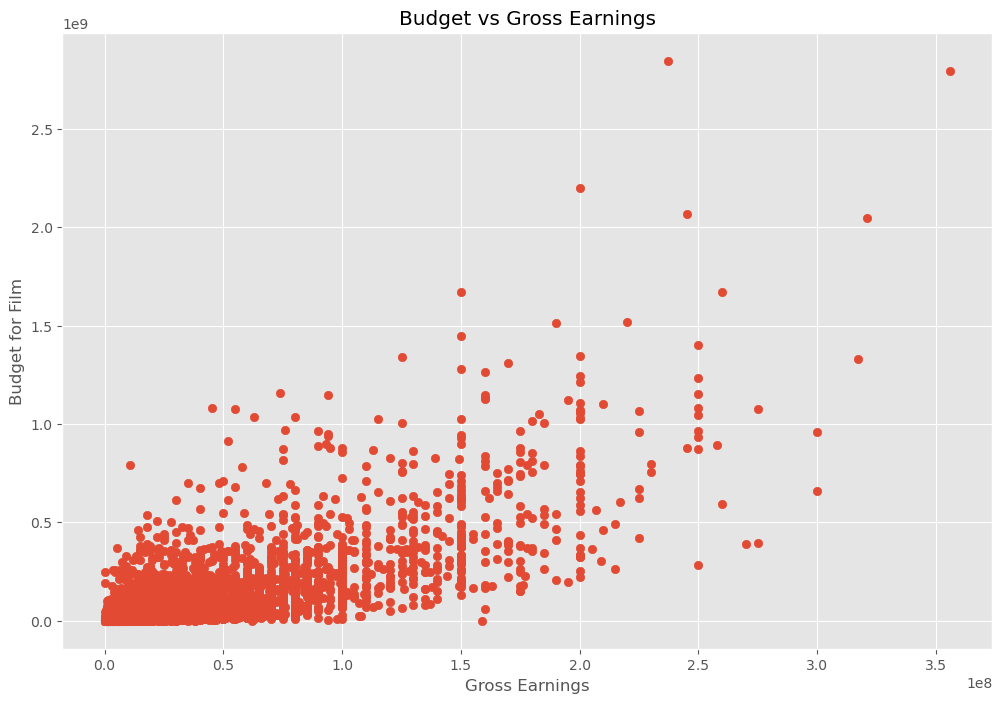

In [31]:
# scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [33]:
df.head()

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5311,Avatar,PG-13,Action,2009.0,Dec-18,2009 (United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7279,Avengers: Endgame,PG-13,Action,2019.0,Apr-26,2019 (United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
2945,Titanic,PG-13,Drama,1997.0,Dec-19,1997 (United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6509,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,Dec-18,2015 (United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7081,Avengers: Infinity War,PG-13,Action,2018.0,Apr-27,2018 (United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


<Axes: xlabel='budget', ylabel='gross'>

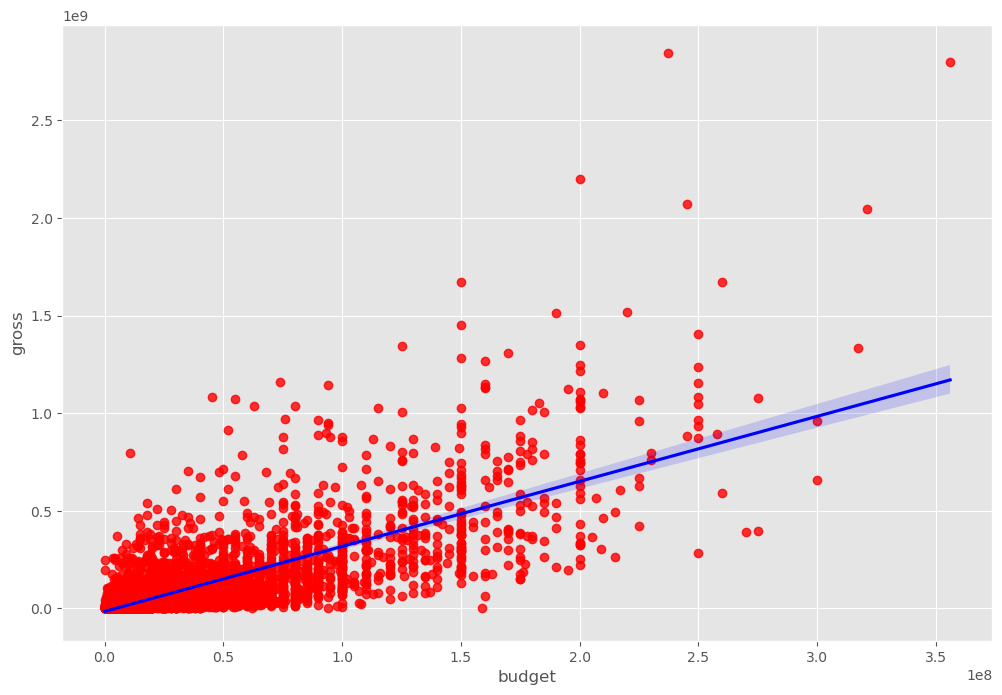

In [124]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color':'blue'})

In [35]:
# looking at correlation

df.corr(numeric_only = True, method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099384,0.220918,0.330384,0.256830,0.119976
score,0.099384,1.000000,0.411993,0.076062,0.188878,0.400943
votes,0.220918,0.411993,1.000000,0.440256,0.630043,0.311450
budget,0.330384,0.076062,0.440256,1.000000,0.739359,0.320958
gross,0.256830,0.188878,0.630043,0.739359,1.000000,0.245663
runtime,0.119976,0.400943,0.311450,0.320958,0.245663,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

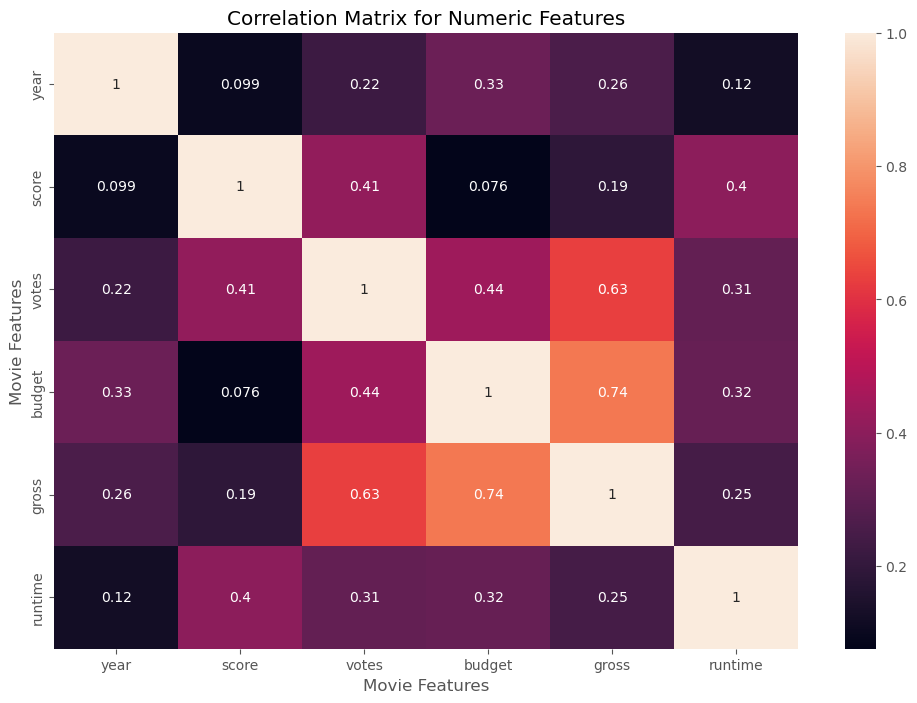

In [37]:
correlation_matrix = df.corr(numeric_only = True, method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [39]:
# looks at company

df.head()

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5311,Avatar,PG-13,Action,2009.0,Dec-18,2009 (United States),7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7279,Avengers: Endgame,PG-13,Action,2019.0,Apr-26,2019 (United States),8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
2945,Titanic,PG-13,Drama,1997.0,Dec-19,1997 (United States),7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6509,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,Dec-18,2015 (United States),7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7081,Avengers: Infinity War,PG-13,Action,2018.0,Apr-27,2018 (United States),8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [41]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5311,523,5,0,2009.0,78,331,7.8,1100000.0,1133,1744,2276,54,237000000.0,2.847246e+09,2197,162.0,29
7279,525,5,0,2019.0,25,516,8.4,903000.0,161,727,2185,54,356000000.0,2.797501e+09,1562,181.0,39
2945,6738,5,6,1997.0,79,145,7.8,1100000.0,1133,1744,1557,54,200000000.0,2.201647e+09,2197,194.0,17
6509,5011,5,0,2015.0,78,455,7.8,876000.0,1105,2504,512,54,245000000.0,2.069522e+09,1497,138.0,35
7081,526,5,0,2018.0,26,500,8.4,897000.0,161,727,2185,54,321000000.0,2.048360e+09,1562,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,6373,-1,0,2020.0,284,520,NaN,NaN,715,103,257,54,10000.0,NaN,-1,90.0,40
7493,3613,-1,6,2020.0,327,520,3.1,18.0,1477,2249,2361,54,7000.0,NaN,-1,90.0,40
7494,1649,-1,4,2020.0,98,520,4.7,36.0,761,2567,1843,54,NaN,NaN,522,90.0,40
7495,2774,-1,6,2020.0,305,520,NaN,NaN,1162,1790,438,54,15000.0,NaN,-1,120.0,40


In [43]:
df

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5311,523,5,0,2009.0,78,331,7.8,1100000.0,1133,1744,2276,54,237000000.0,2.847246e+09,2197,162.0,29
7279,525,5,0,2019.0,25,516,8.4,903000.0,161,727,2185,54,356000000.0,2.797501e+09,1562,181.0,39
2945,6738,5,6,1997.0,79,145,7.8,1100000.0,1133,1744,1557,54,200000000.0,2.201647e+09,2197,194.0,17
6509,5011,5,0,2015.0,78,455,7.8,876000.0,1105,2504,512,54,245000000.0,2.069522e+09,1497,138.0,35
7081,526,5,0,2018.0,26,500,8.4,897000.0,161,727,2185,54,321000000.0,2.048360e+09,1562,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7492,6373,-1,0,2020.0,284,520,NaN,NaN,715,103,257,54,10000.0,NaN,-1,90.0,40
7493,3613,-1,6,2020.0,327,520,3.1,18.0,1477,2249,2361,54,7000.0,NaN,-1,90.0,40
7494,1649,-1,4,2020.0,98,520,4.7,36.0,761,2567,1843,54,NaN,NaN,522,90.0,40
7495,2774,-1,6,2020.0,305,520,NaN,NaN,1162,1790,438,54,15000.0,NaN,-1,120.0,40


<function matplotlib.pyplot.show(close=None, block=None)>

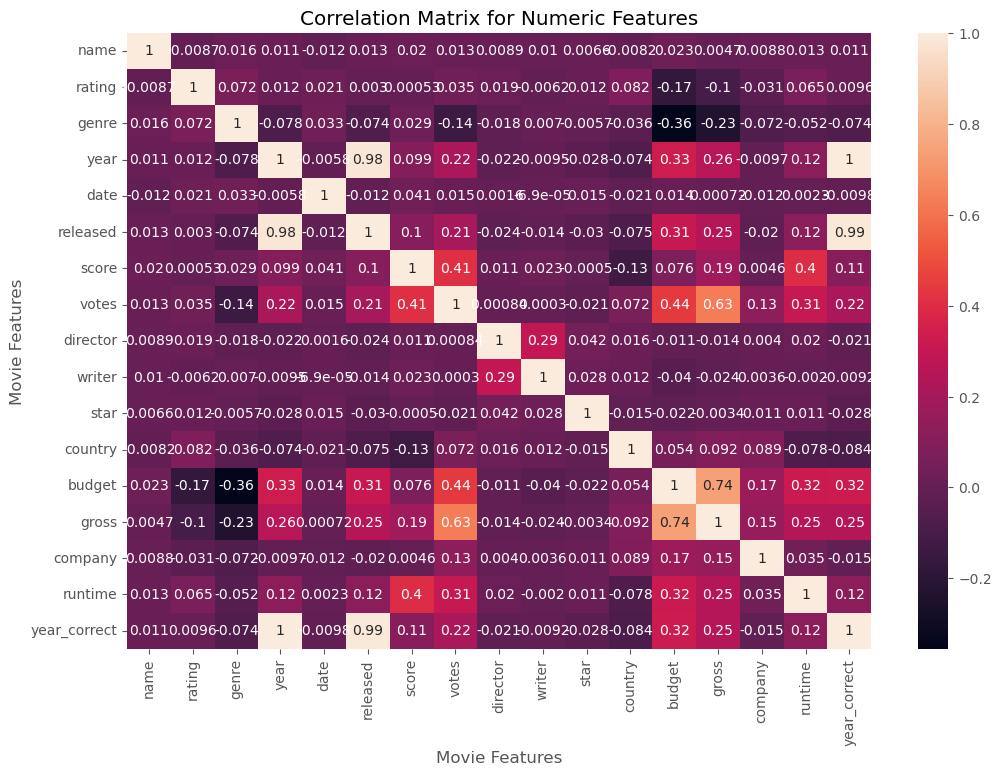

In [45]:
correlation_matrix = df_numerized.corr(numeric_only = True, method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

In [47]:
df_numerized.corr()

,name,rating,genre,year,date,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008712,0.016246,0.011362,-0.011993,0.013334,0.019681,0.013059,0.008886,0.010099,0.006581,-0.008191,0.022890,0.004715,0.008839,0.012797,0.011074
rating,-0.008712,1.000000,0.072282,0.011658,0.021240,0.003007,0.000530,0.035414,0.019046,-0.006235,0.012362,0.081812,-0.174966,-0.104978,-0.031209,0.065216,0.009623
genre,0.016246,0.072282,1.000000,-0.077741,0.032504,-0.074257,0.028822,-0.142079,-0.017698,0.007018,-0.005660,-0.036015,-0.355028,-0.234195,-0.071597,-0.052385,-0.074154
year,0.011362,0.011658,-0.077741,1.000000,-0.005762,0.983202,0.099384,0.220918,-0.021797,-0.009543,-0.027747,-0.073845,0.330384,0.256830,-0.009677,0.119976,0.997570
date,-0.011993,0.021240,0.032504,-0.005762,1.000000,-0.012467,0.041285,0.015104,0.001584,-0.000069,0.015147,-0.020547,0.014031,0.000716,-0.012281,0.002301,-0.009800
released,0.013334,0.003007,-0.074257,0.983202,-0.012467,1.000000,0.102056,0.205901,-0.024212,-0.013879,-0.029702,-0.075129,0.310155,0.252916,-0.019525,0.117704,0.985324
score,0.019681,0.000530,0.028822,0.099384,0.041285,0.102056,1.000000,0.411993,0.011342,0.022767,-0.000501,-0.129148,0.076062,0.188878,0.004622,0.400943,0.107038
votes,0.013059,0.035414,-0.142079,0.220918,0.015104,0.205901,0.411993,1.000000,0.000839,0.000305,-0.020580,0.071939,0.440256,0.630043,0.131692,0.311450,0.216542
director,0.008886,0.019046,-0.017698,-0.021797,0.001584,-0.024212,0.011342,0.000839,1.000000,0.294469,0.041976,0.015716,-0.011018,-0.014040,0.004043,0.020322,-0.020944
writer,0.010099,-0.006235,0.007018,-0.009543,-0.000069,-0.013879,0.022767,0.000305,0.294469,1.000000,0.027649,0.011588,-0.039689,-0.024027,0.003593,-0.002029,-0.009166


In [49]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              rating         -0.008712
              genre           0.016246
              year            0.011362
              date           -0.011993
                                ...   
year_correct  budget          0.323284
              gross           0.250004
              company        -0.014568
              runtime         0.119720
              year_correct    1.000000
Length: 289, dtype: float64

In [51]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre         budget         -0.355028
budget        genre          -0.355028
genre         gross          -0.234195
gross         genre          -0.234195
rating        budget         -0.174966
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 289, dtype: float64

In [53]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4]

high_corr

score         runtime         0.400943
runtime       score           0.400943
score         votes           0.411993
votes         score           0.411993
              budget          0.440256
budget        votes           0.440256
votes         gross           0.630043
gross         votes           0.630043
              budget          0.739359
budget        gross           0.739359
released      year            0.983202
year          released        0.983202
released      year_correct    0.985324
year_correct  released        0.985324
              year            0.997570
year          year_correct    0.997570
name          name            1.000000
director      director        1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
votes         votes           1.000000
score         score      